In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import empiricaldist as ed

In [2]:
data = pd.read_csv('csv/accident_data.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,04/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,NaN,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,07/01/2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,NaN,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,NaN,0.0,NaN,0.0,Slight,None,10/01/2005,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No


In [5]:
data.isna().sum()

Accident_Index                                      0
1st_Road_Class                                 305589
1st_Road_Number                                     2
2nd_Road_Class                                 439824
2nd_Road_Number                                 10803
Accident_Severity                                   0
Carriageway_Hazards                                29
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       269
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          111
Light_Conditions                                 2084
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             111
Location_Northing_OSGR                            111
Longitude                   

In [6]:
data['1st_Road_Class'].value_counts()

A           470854
B           133179
C            93983
Motorway     42297
A(M)          2673
Name: 1st_Road_Class, dtype: int64

In [7]:
data['2nd_Road_Class'].value_counts()

Unclassified    411064
A               102148
C                47542
B                40221
Motorway          6980
A(M)               796
Name: 2nd_Road_Class, dtype: int64

In [8]:
data['Accident_Severity'].value_counts()

Slight     895883
Serious    138192
Fatal       14500
Name: Accident_Severity, dtype: int64

In [9]:
data['Carriageway_Hazards'].value_counts()

None                                               1028834
Other object on road                                  8975
Any animal in carriageway (except ridden horse)       5614
Pedestrian in carriageway - not injured               2257
Previous accident                                     1722
Vehicle load on road                                  1144
Name: Carriageway_Hazards, dtype: int64

In [10]:
data['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()

1.0    843106
2.0    202134
3.0      3066
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

In [11]:
data['Junction_Control'].value_counts()

Give way or uncontrolled               502984
Data missing or out of range           353871
Auto traffic signal                    105500
Not at junction or within 20 metres     76916
Stop sign                                7128
Authorised person                        1838
Auto traffic sigl                         338
Name: Junction_Control, dtype: int64

In [12]:
data['Junction_Detail'].value_counts()

Not at junction or within 20 metres    429428
T or staggered junction                318963
Crossroads                              98456
Roundabout                              88932
Private drive or entrance               37132
Other junction                          34533
Slip road                               15568
More than 4 arms (not roundabout)       15553
Mini-roundabout                         10000
Data missing or out of range               10
Name: Junction_Detail, dtype: int64

In [13]:
data['Light_Conditions'].value_counts()

Daylight                       764036
Darkness - lights lit          207972
Darkness - no lighting          60795
Darkness - lighting unknown      9372
Darkness - lights unlit          4316
Name: Light_Conditions, dtype: int64

In [14]:
data['InScotland'].value_counts()

No     985871
Yes     62661
Name: InScotland, dtype: int64

## Observations:

1. Accident_Index = no missing values
<br><br> 
2. 1st_Road_Class = 305589 missing values
    - Has categories A, B, C, Motorway, A(M)
<br><br> 
3. 1st_Road_Number = 2 missing values
<br><br> 
4. 2nd_Road_Class = 439824 missing values
    - Has categories Unclassified, A, B, C, Motorway, A(M)
<br><br>   
5. 2nd_Road_Number = 439824 missing values
<br><br> 
6. Accident_Severity = 0 missing values
    - Has categories Slight, Serious, Fatal
<br><br>     
7. Carriageway_Hazards = 29 missing values
    - Has categories None, Other Object, Animal, Pedestrian, Previous Accident, Vehicle
<br><br>    
8. Date = 0 missing values
<br><br> 
9. Day_of_Week = 0 missing values
<br><br> 
10. Did_Police_Officer_Attend_Scene_of_Accident = 269 missing values
    - Has categories 1.0 (yes), 2.0 (no), 3.0 (reported by self-completion form)
<br><br>     
11. Junction_Control = 0 missing values
    - Has categories with very big text names, it is necessary to map them or encode them using numbers to reduce computation.
<br><br> 
12. Junction_Detail = 0 missing values
    - Has categories with very big text names, it is necessary to map them or encode them using numbers to reduce computation.
<br><br>     
13. Latitude = 111 missing values
<br><br> 
14. Light_Conditions = 2084 missing values
    - Has categories Daylight, Darkness - lights lit/no lighting/lighting unknown/lights unlit
<br><br>     
15. Local_Authority_(District) = 0 missing values
<br><br> 
16. Local_Authority_(Highway) = 0 missing values
<br><br> 
17. Location_Easting_OSGR = 111 missing values
<br><br> 
18. Location_Northing_OSGR = 111 missing values
<br><br> 
19. Longitude = 112 missing values
<br><br> 
20. LSOA_of_Accident_Location = 71890 missing values
<br><br> 
21. Number_of_Casualties = 0 missing values
<br><br> 
22. Number_of_Vehicles = 0 missing values
<br><br>  
23. Pedestrian_Crossing-Human_Control = 21 missing values
    - Has categories 1(None with 50m), 2(control by school crossing patrol), 3(control by authorized person)
<br><br> 
24. Pedestrian_Crossing-Physical_Facilities = 37 missing values
    - Has categories but it doesnt match with the categories given in the data description/glossary.
<br><br> 
25. Police_Force = 0 missing values
<br><br> 
26. Road_Surface_Conditions = 1189 missing values
    - Has categories Dry, Web Or Damp, Frost or Ice, Snow, Flood Over 3cm deep
<br><br> 
27. Road Type = 7266 missing values
    - Has categories Single Carriageway, Dual Carriageway, Roundabout, One way street, Slip Road
<br><br> 
28. Special_Conditions_at_Site = 16 missing values
    - Has 10 different categories.
<br><br>
29. Speed_Limit = 0 missing values 
    - 8 Different Values/Ranges.
<br><br> 
30. Time = 100 missing values 
<br><br> 
31. Urban_or_Rural_Area = 85 missing values
    - Has categories urban, rural, unallocated.
<br><br> 
32. Weather_Conditions = 21392 missing values
    - Has 8 categories.
<br><br> 
33. Year = 0 missing values
    - 2005 till 2010
<br><br> 
34. InScotland = 43 missing values
    - Has categories Yes, No

## Some Solutions:

1. We can remove the missing values of those columns by simply dropping those rows which constitute less than 5% of the data.
<br><br>
2. For missing values in columns whose rows constitute more than 5% of the data, we can do Imputation, a technique where we can guess the missing values;
    - We can use mean or median for numerical values.
    - We can use mode (most frequent value) for categorial values.
<br><br>
3. An important thing to note is that, most values of columns are in text form, and some are very large texts and occupy a lot of space. By encoding those columns and mapping them to numerical values, we can save space, time and overall computation when we will be analysing the data.
<br><br>

## Insights

In [15]:
data_subset = data.copy()

data_subset.shape

(1048575, 34)

In [16]:
data_subset.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

### **NUMBER OF CASUALITIES IN EACH TYPE OF ACCIDENT**

<AxesSubplot:xlabel='Accident_Severity'>

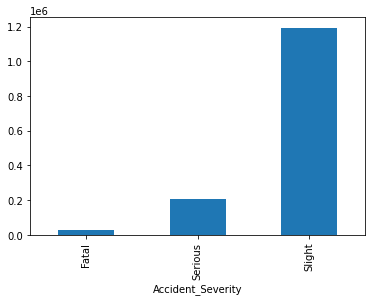

In [17]:
num_casualties = data_subset.groupby('Accident_Severity')['Number_of_Casualties'].sum()
num_casualties.plot(kind = 'bar')

<AxesSubplot:xlabel='Accident_Severity'>

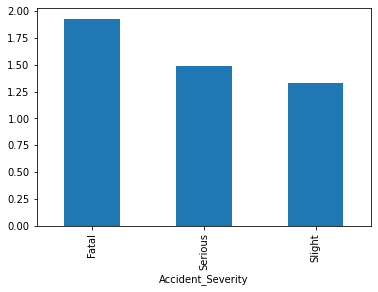

In [18]:
num_casualties = data_subset.groupby('Accident_Severity')['Number_of_Casualties'].mean()
num_casualties.plot(kind = 'bar')

#### **Conclusion:**
- It seems that average number of casualties for each class is around 1 - 2.
- And most of the casualties that have happened over the years are Slight!

### **NUMBER OF VEHICLES INVOLVED IN EACH TYPE OF ACCIDENT**

<AxesSubplot:xlabel='Accident_Severity'>

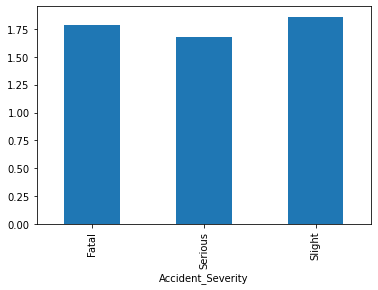

In [19]:
num_vehicles = data_subset.groupby('Accident_Severity')['Number_of_Vehicles'].mean()
num_vehicles.plot(kind = 'bar')

#### **Conclusion:**
- Average number of vehicles involved for each type of accident is also around 1 - 2.

### **AVERAGE AND TOTAL CASUALITIES OVER THE YEARS**

<AxesSubplot:xlabel='Year'>

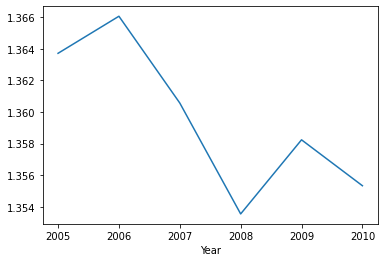

In [20]:
avg_casualties = data_subset.groupby('Year')['Number_of_Casualties'].mean()
avg_casualties.plot()

<AxesSubplot:xlabel='Year'>

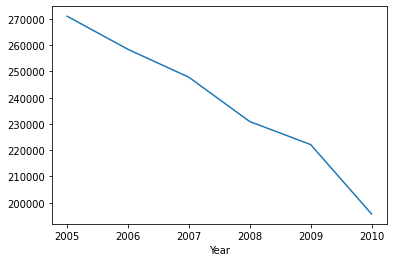

In [21]:
casualties = data_subset.groupby('Year')['Number_of_Casualties'].sum()
casualties.plot()

#### **Conclusion:**
The average casualties from the years 2005 to 2010 have decreased.

### **SPEED VS NUMBER OF CASUALTIES**

<AxesSubplot:xlabel='Speed_limit'>

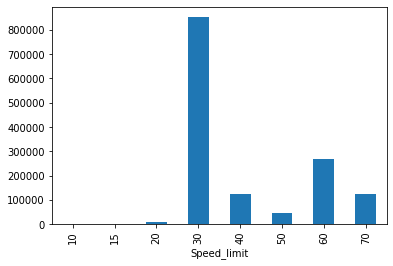

In [22]:
speed_vs_casualties = data_subset.groupby('Speed_limit')['Number_of_Casualties'].sum()
speed_vs_casualties.plot(kind = 'bar')

<AxesSubplot:>

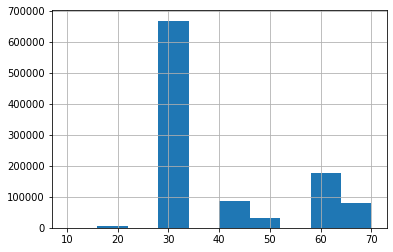

In [23]:
data_subset['Speed_limit'].hist()

#### **Conclusion:**
Most of the casualties happened when the speed was 30mph!

### **ROAD TYPE DISTRIBUTION**

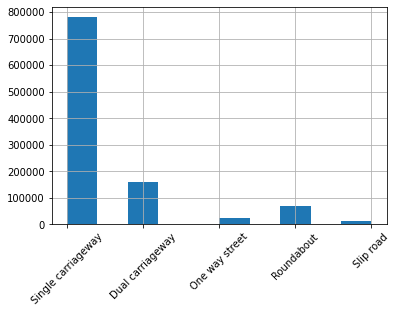

In [24]:
data_subset['Road_Type'].hist()
plt.xticks(rotation = 45);

#### **Conclusion:**
- Most of the accidents happend on the Single Carriageway Road Type!

### **JUNCTION CONTROL DISTRIBUTION**

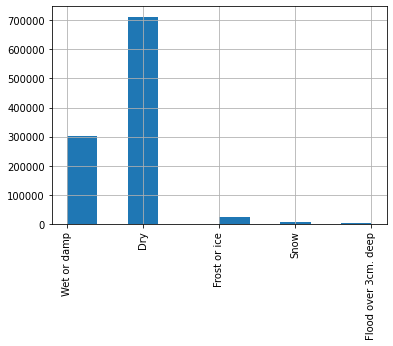

In [25]:
data_subset['Road_Surface_Conditions'].hist()
plt.xticks(rotation = 90);

#### **Conclusion:**
- Most of the accidents happened on Dry Road Conditions

## Exploring Data Further

#### SPEED LIMIT USING PMF

In [26]:
# speed-limit using PMF (how often does each value occur in the dataset)

pmf_speed = ed.Pmf.from_seq(data_subset['Speed_limit'], normalize = True)
pmf_speed[30] * 100

# 60% of the data comrpises of accidents happened at 30mph

63.67689483346446

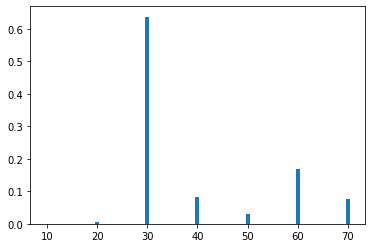

In [27]:
pmf_speed.bar(label = data_subset['Speed_limit'])

#### DAY LIMIT USING PMF

Friday       16.394631
Monday       14.162649
Saturday     13.563837
Sunday       11.065780
Thursday     14.857116
Tuesday      14.888682
Wednesday    15.067306
Name: , dtype: float64


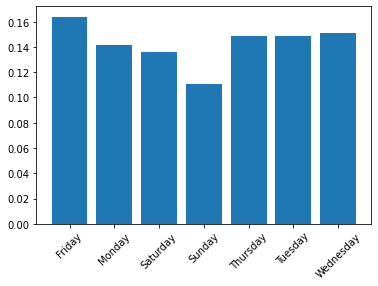

In [28]:
pmf_day = ed.Pmf.from_seq(data_subset['Day_of_Week'], normalize = True)
print(pmf_day*100)
pmf_day.bar(label = data_subset['Day_of_Week'])
plt.xticks(rotation = 45);

# there is no relation between the day of the week and the accidents occured.

#### Comparing Speed Across Different Accident Severities

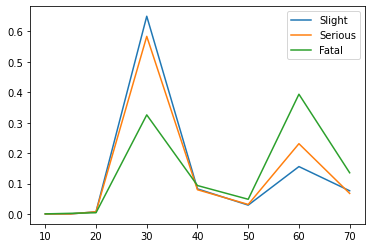

In [29]:
severity1 = data_subset[data_subset['Accident_Severity'] == 'Slight']['Speed_limit']
severity2 = data_subset[data_subset['Accident_Severity'] == 'Serious']['Speed_limit']
severity3 = data_subset[data_subset['Accident_Severity'] == 'Fatal']['Speed_limit']


pmf_severity1 = ed.Pmf.from_seq(severity1, normalize = True)
pmf_severity2 = ed.Pmf.from_seq(severity2, normalize = True)
pmf_severity3 = ed.Pmf.from_seq(severity3, normalize = True)

pmf_severity1.plot(label = 'Slight')
pmf_severity2.plot(label = 'Serious')
pmf_severity3.plot(label = 'Fatal')
plt.legend()
plt.show()

#### Seeing Distributions of Light Conditions!

In [37]:
pmf_light = ed.Pmf.from_seq(data_subset['Light_Conditions'], normalize = True)
pmf_light

,probs
Darkness - lighting unknown,0.008956
Darkness - lights lit,0.198733
Darkness - lights unlit,0.004124
Darkness - no lighting,0.058094
Daylight,0.730093


<AxesSubplot:>

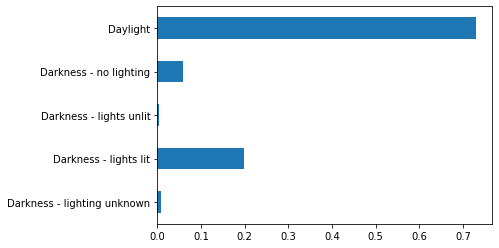

In [40]:
pmf_light.plot(kind = 'barh')

## Compilied Conclusions:

- Average number of casualties for each accident severity is around 1 - 2.
- Most of the casualties that have happened over the years have severity SLIGHT.
- Average number of vehicles for each accident severity are 2 vehicles.
- The average and total casualties over the years (2005 - 2010) have decreased!
- Most of the accidents happened when the speed was around 30mph.
- About 63% of the accidents happened at 30mph.
- Most of the accidents happened on Single Carriageway Road Type.
- Most of the accidents happend on Dry Road conditions.
- There is no relation between the day of the week and the accidents occured!
- Most of the accidents (about 73% of them) happened during DayLight.